Sankt-Peyersburg is a buautiful Russian city. It is called the Cultural Capital of Russia. We are going to do an analysis of city memorials which can be usef for planning the city budget for renovation of touristc areas. We take memorials data kindly provided by city administration

In [191]:
import pandas
import seaborn

data = pandas.read_csv('spb_memo.csv')
print('Количество строк:', len(data))


Количество строк: 9275


wow, there are 9 275 memorial ovjects in Sankt-Petersburg. Which districts are they in?

In [145]:
data.head()

number name                                        name_object  \
0       1  NaN  Здание Консисторского управления Могилевской Р...   
1       2  NaN  Здание манежа (экзерциргауса) лейб-гвардии Изм...   
2       3  NaN  Дом, где в начале 1895 г. Ленин В.И. встречалс...   
3       4  NaN                        Трансформаторная подстанция   
4       5  NaN  Манеж графа Г.И. Рибопьера (Здание Санкт-Петер...   

                                         date  \
0  1870-1873; 1878-1879; 1896-1897; 1900-1902   
1                                   1795-1797   
2                                         NaN   
3                                   1906-1907   
4                                  1887; 1891   

                                              author  \
0  арх. В.И. Собольщиков, Е.С. Воротилов; арх. Е....   
1                                  арх. Кварнеги Дж.   
2                                                NaN   
3                          гражд.инж. Горенберг Л.Б.   
4               арх. А.А. Степанов; арх. М.С. Шуцман   

                                             address        district  \
0             1-я Красноармейская ул., 11, лит. А, Б  Адмиралтейский   
1  1-я Красноармейская ул., 13; Измайловский пр.,...  Адмиралтейский   
2                        1-я Красноармейская ул., 22  Адмиралтейский   
3                       11-я Красноармейская ул., 28  Адмиралтейский   
4                        2-я Красноармейская ул., 12  Адмиралтейский   

                                 protection_category  \
0  Объект культурного наследия регионального знач...   
1  Объект культурного наследия регионального знач...   
2  Объект культурного наследия регионального знач...   
3  Объект культурного наследия регионального знач...   
4  Объект культурного наследия регионального знач...   

                                                base  note  
0           Распоряжение КГИОП № 10-22 от 21.07.2009   NaN  
1      Закон Санкт-Петербурга № 141-47 от 02.07.1997   NaN  
2      Закон Санкт-Петербурга № 141-47 от 02.07.1997   NaN  
3  Решение исполкома Ленгорсовета № 963 от 05.12....   NaN  
4           Распоряжение КГИОП № 10-26 от 15.09.2009   NaN

In [192]:
districts = list(data['district'])
districts_unique = list(set(districts))
print(districts_unique)

['Адмиралтейский', 'Кронштадтский', 'Колпинский', 'Курортный', 'Фрунзенский', 'Выборгский', 'Московский', 'Пушкинский', 'Санкт-Петербург', 'Петродворцовый', 'Красносельский', 'Кировский', 'Красногвардейский', 'Мосты и набережные', 'Калининский', 'Приморский', 'Центральный', 'Василеостровский', 'Невский', 'Кронштадт', 'Петроградский']


<AxesSubplot:>

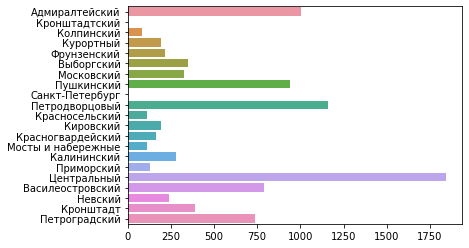

In [147]:
total_per_district = []

for district in districts_unique:
    district_counter = 0
    for index in range(len(districts)):
        if districts[index] == district:
            district_counter += 1
    total_per_district.append(district_counter)

seaborn.barplot(x=total_per_district, y=districts_unique)


Ok, that's expected, the most points of our interest are located in Central district as well as In Peters's The Great Castl and Admirals district



In [148]:
outside_districts = ['Пушкинский', 'Кронштадтский', 'Кронштадт', 
    'Колпинский', 'Курортный', 'Приморский', 'Санкт-Петербург']
districts_unique = [item for item in districts_unique 
    if item not in outside_districts ]


['Выявленный объект культурного наследия', 'Объект культурного наследия регионального значения', 'Объект культурного наследия федерального значения']


<AxesSubplot:>

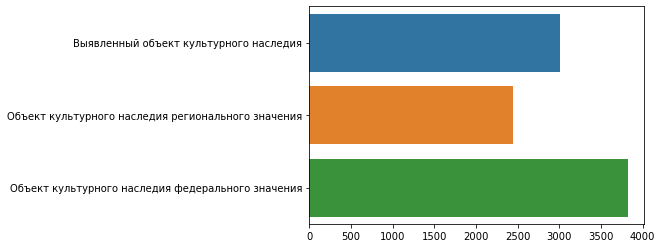

In [162]:
protection_categories = list(data['protection_category'])
protection_categories_unique = list(set(protection_categories))
total_per_category = []

for category in set(protection_categories):
    category_counter = 0
    for index in range(len(districts)):
        if protection_categories[index] == category:
            category_counter += 1
    total_per_category.append(category_counter)
    
print(protection_categories_unique)

seaborn.barplot(x=total_per_category, y=protection_categories_unique)

<AxesSubplot:xlabel='count', ylabel='name'>

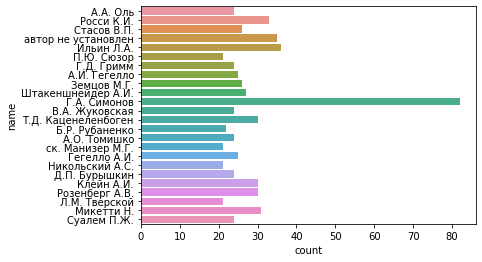

In [194]:
authors_all = list(data['author'])
authors = []
total_per_author = []
    
for author_line in authors_all:
    if author_line == author_line:
        if ',' in author_line:
            for author in author_line.replace(';', ',').replace('арх. ', '').replace('худ. ', '').replace('гражд.инж. ', '').replace('архитекторы ', '').replace('фонтанный мастер ', '').replace('арх-ры ', '').split(','):
                author = author.strip()
                if author not in authors:
                    authors.append(author.strip())
                    total_per_author.append(1)
                else:
                    index = authors.index(author.strip())
                    total_per_author[index] += 1
        else:
            if author not in authors:
                authors.append(author.strip())
                
authors_df = pandas.DataFrame(authors, columns=['name'])
authors_df['count'] = total_per_author

most_frequent_authors_df = authors_df.loc[(authors_df['count'] > 20)]
    
seaborn.barplot(x=most_frequent_authors_df['count'], y=most_frequent_authors_df['name'])

<AxesSubplot:ylabel='district'>

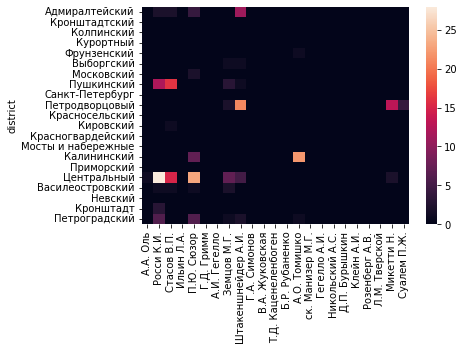

In [196]:
districts_authors_df = pandas.DataFrame(districts_unique, columns=['district'])
lat = []
lon = []

for col in most_frequent_authors_df['name']:
    districts_authors_df[col] = 0
    
districts_authors_df.set_index('district', inplace=True)

top_poi = []

for district in districts_unique:
    district_df = data.loc[(data['district'] == district) & (~data["date"].str.contains('19', na=True))]
    for index, row in district_df.iterrows():
        for author in most_frequent_authors_df['name']:
            if row['author'] == row['author'] and author in row['author']:
                districts_authors_df[author][district] += 1
                top_poi.append(row['number'])

districts_authors_df.drop('автор не установлен', axis=1, inplace=True)
#districts_authors_df = districts_authors_df.loc[(districts_authors_df>5).any(axis=1)] #!=0

#print(top_poi)

seaborn.heatmap(districts_authors_df, xticklabels=True, yticklabels=True) #, annot=True

In [ ]:
df = pandas.read_csv('spb_memo.csv')
df['lat'] = float('nan')
df['lon'] = float('nan')
#df.to_csv("spb_memo_geo.csv", index=False)

In [167]:
df = pandas.read_csv('spb_memo_geo.csv')
from decimal import Decimal
import os
from dotenv import load_dotenv
from yandex_geocoder import Client

load_dotenv('.env')
yandex_geo_api_key = os.environ.get("yaGeoApi")
client = Client(yandex_geo_api_key)

coordinates = 0
api_limit_per_day = 1000

for poi in top_poi:
    if api_limit_per_day > 0:
        poi_row = df.loc[(df['number'] == poi)]
        if poi_row.empty:
            lat = float('nan')
        else:
            lat = list(poi_row['lat'])[0]
        addr = list(poi_row['address'])
        if lat != lat and len(addr) > 0 and addr[0] == addr[0] and len(addr[0]) > 5:
            coords = client.coordinates("Санкт-Петербург, " + addr[0])
            df.loc[poi_row.index, 'lon'], df.loc[poi_row.index, 'lat'] = coords
            api_limit_per_day -= 1
            df.to_csv("spb_memo_geo.csv", index=False)


Let's apply all our previous filters

<AxesSubplot:>

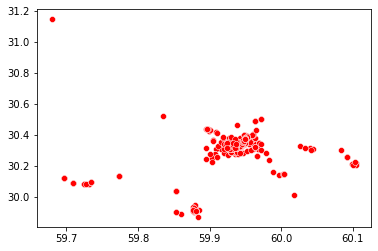

In [200]:
df = pandas.read_csv('spb_memo_geo.csv')
#df = df.loc[~df["date"].str.contains('19', na=True)]#lat_lon = df.loc[(df['lat'].notnull())]
lat_lon = df[df['number'].isin(top_poi)]
x = list(lat_lon['lat'])
y = list(lat_lon['lon'])
#list(df.loc[(df['lon'].notnull())]['lon'])

seaborn.scatterplot(x=x, y=y, c=['red'])

In [197]:
print(df.loc[(df['lat'] < 59.8) & (df['lon'] > 31)]['name'])

7917    Летний сад
Name: name, dtype: object


<AxesSubplot:>

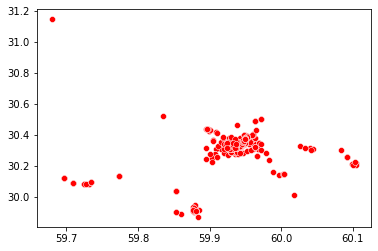

In [138]:
lat_lon = df.loc[(df['lat'] > 55) & (df['lon'] > 25)]
x = list(lat_lon['lat'])
y = list(lat_lon['lon'])

seaborn.scatterplot(x=x, y=y, c=['red'])

<AxesSubplot:>

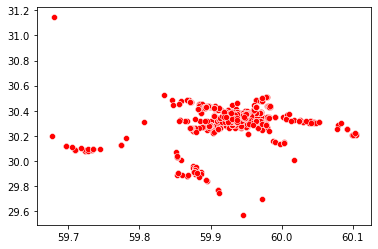

In [198]:
lat_lon = df.loc[(df['lat'] > 55) & (df['lat'] < 62) & (df['lon'] > 29) & (df['lon'] < 32)]
x = list(lat_lon['lat'])
y = list(lat_lon['lon'])

seaborn.scatterplot(x=x, y=y, c=['red'])

<AxesSubplot:>

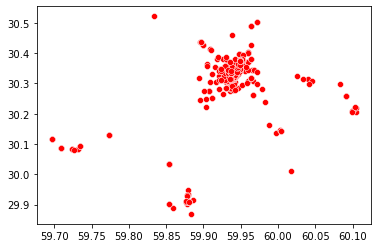

In [201]:
lat_lon = df.loc[df['number'].isin(top_poi) & (df['lat'] > 59.6) & 
    (df['lat'] < 62) & (df['lon'] > 29) & (df['lon'] < 30.8)]
x = list(lat_lon['lat'])
y = list(lat_lon['lon'])

seaborn.scatterplot(x=x, y=y, c=['red'])

#lat_lon = df[]


In [202]:
#Length in meters of 1° of latitude = always 111.32 km
#Length in meters of 1° of longitude = 40075 km * cos( latitude ) / 360

print(len(lat_lon))
lat_diff = Decimal(max(x)) - Decimal(min(x))
km_diff = Decimal(lat_diff) * Decimal(111.32)
print(km_diff)

351
45.40898648000057795856719167


30.287499099715117 , 59.929313632478575


<AxesSubplot:>

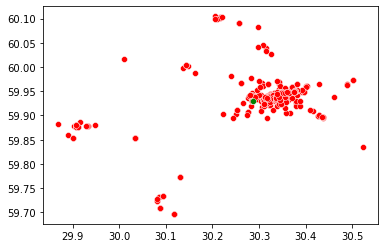

In [203]:
xy_center = (sum(x) / len(x), sum(y) / len(x)) 
print(xy_center[1], ',', xy_center[0])

#59.926768, 30.294057

seaborn.scatterplot(x=y, y=x, c=['red'])
seaborn.scatterplot(x=[xy_center[1]], y=[xy_center[0]], c=['green'])

In [160]:
address = client.address(Decimal("30.294057"), Decimal("59.926768"))
print(address)

Россия, Санкт-Петербург, набережная Крюкова канала


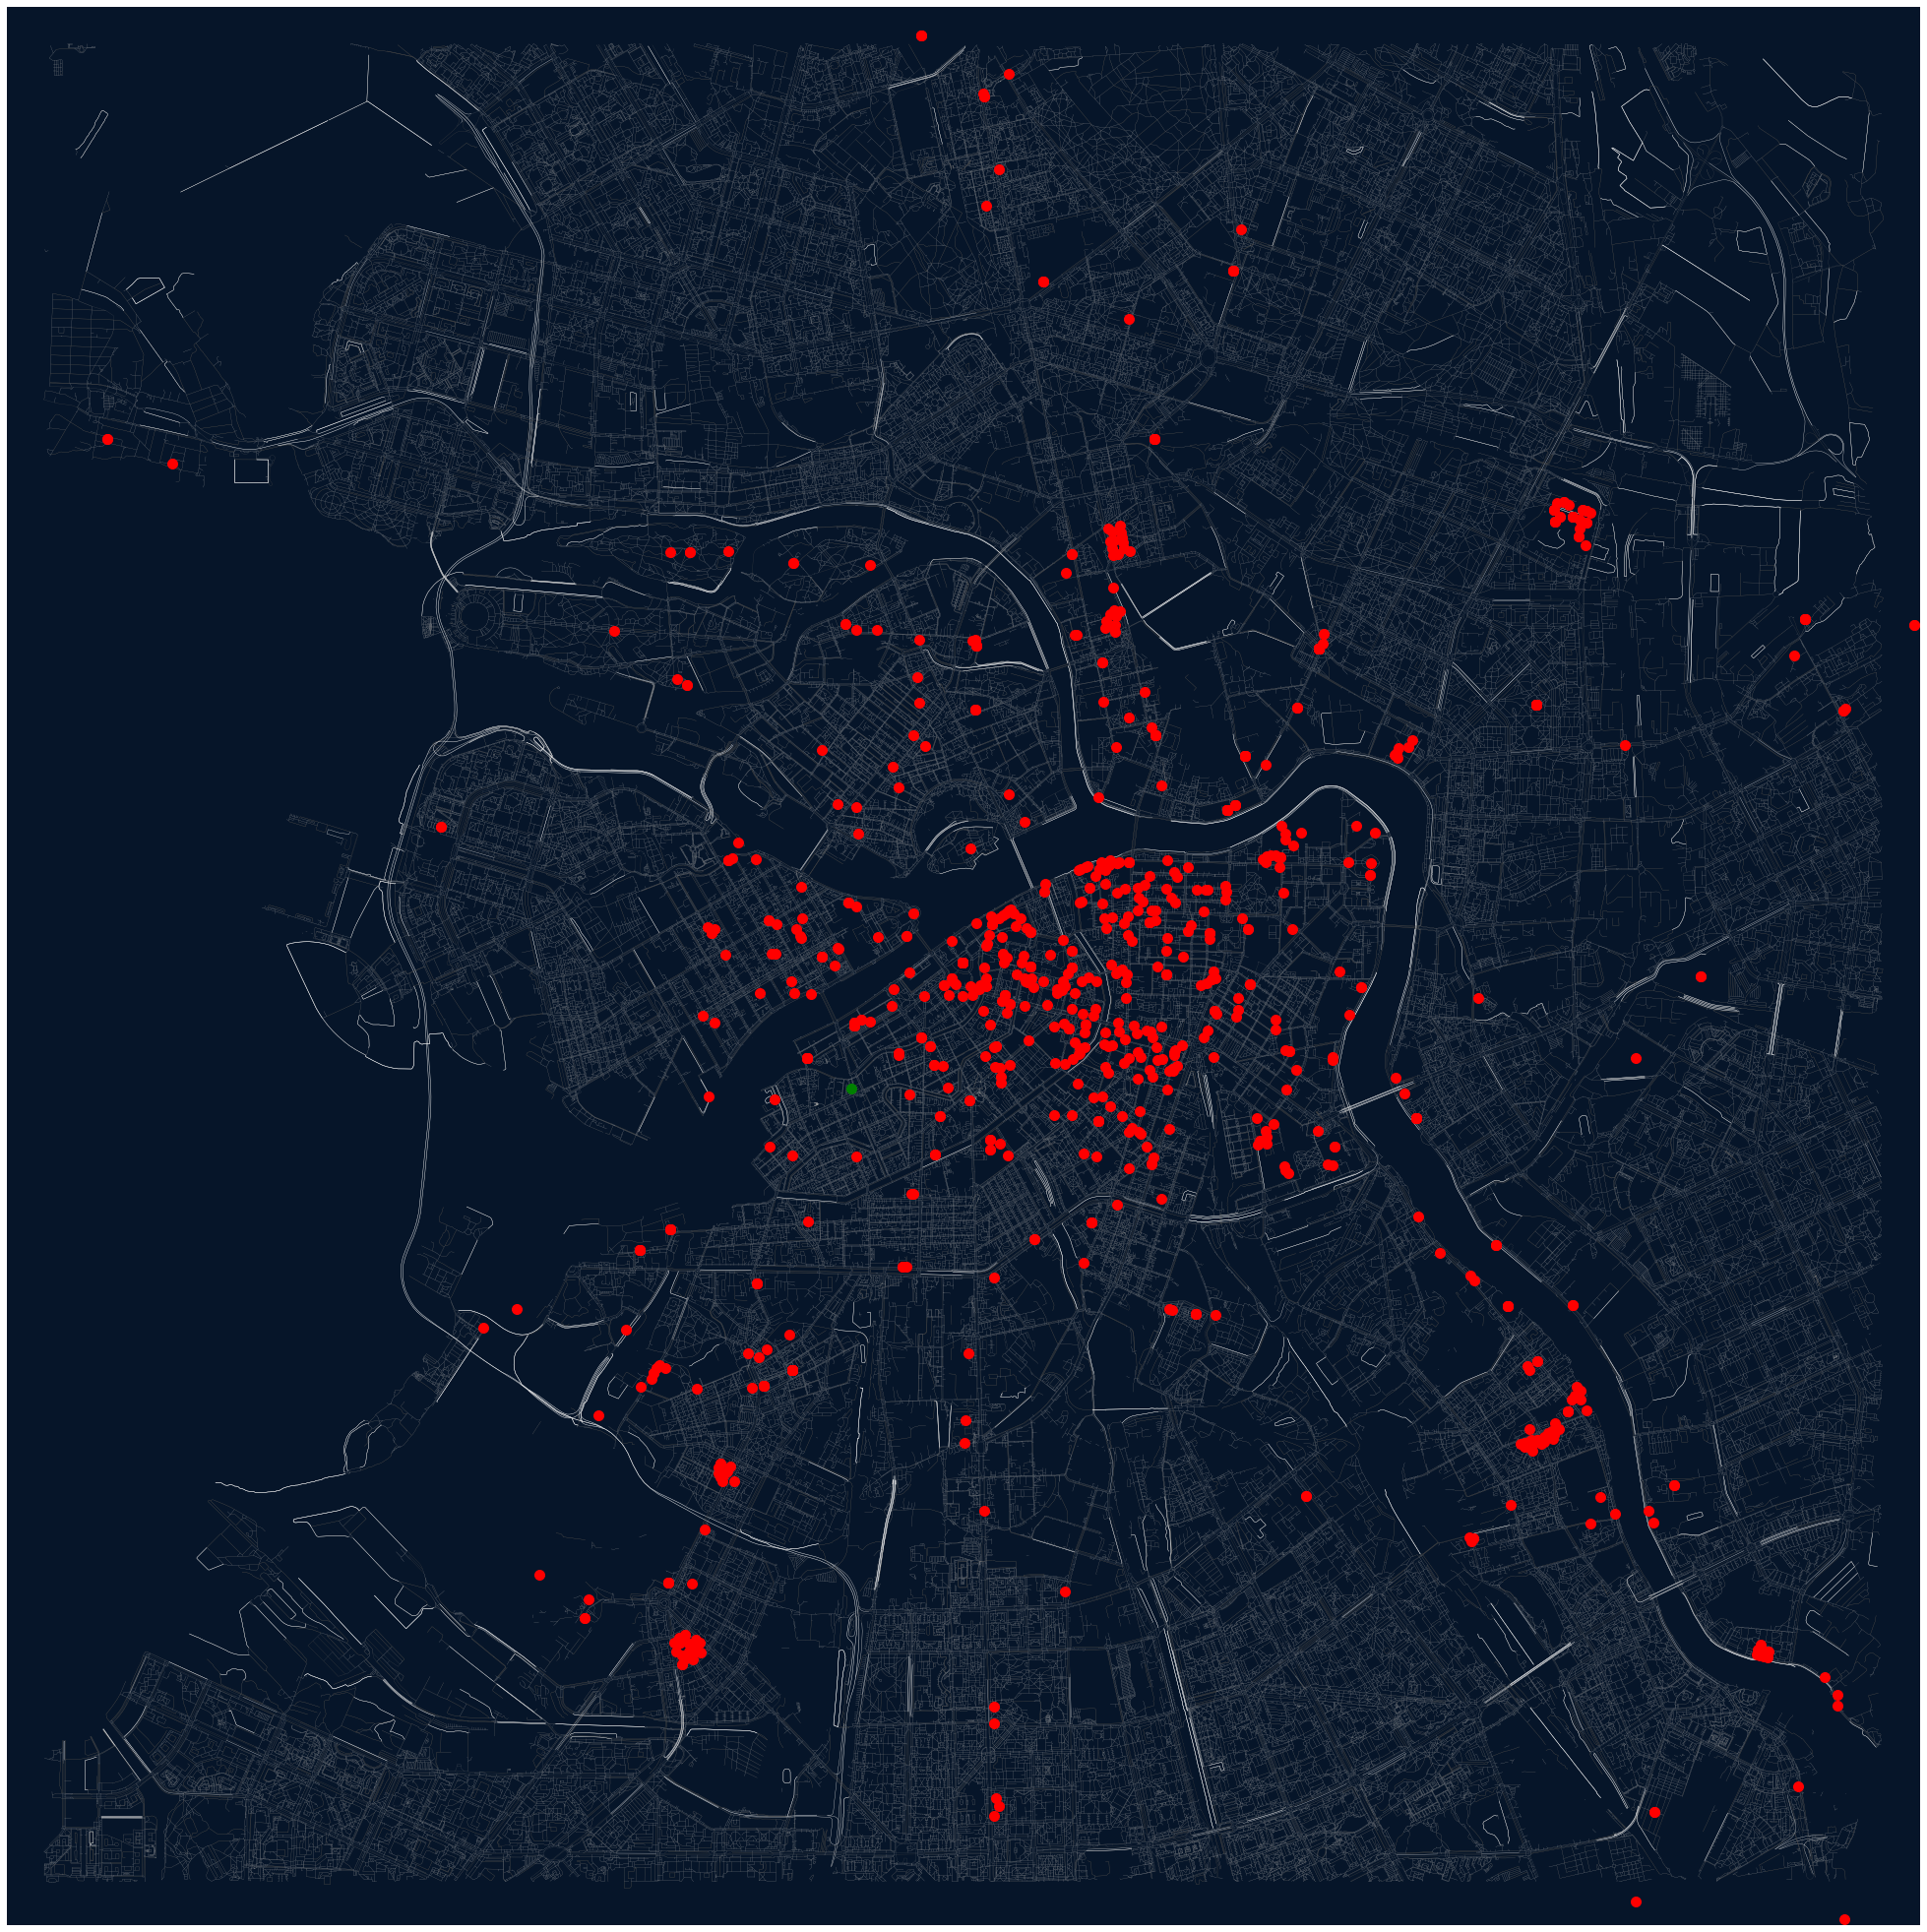

In [189]:
import osmnx as ox

point = (59.939099, 30.315877)
G = ox.graph_from_point(point, dist=10000, retain_all=True, simplify = True, network_type='all')

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

# List to store colors
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#d5d5d5"
            linewidth = 0.35
        else:
            color = "#ededed"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)
            

# Center of map
latitude = 59.939099
longitude = 30.315877

bgcolor = "#061529"

fig, ax = ox.plot_graph(G, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1,
                        show=False, close=False)

'''
# Bbox sides
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15
fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)
'''

for i in range(len(x)): #
    ax.scatter(y[i], x[i], s = 100, c='red')

ax.scatter(30.317329, 59.950276, s = 100, c='red')

ax.scatter(xy_center[1], xy_center[0], s = 100, c='green')

fig.tight_layout(pad=0)
fig.savefig("roadMap.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)